In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [5]:
df1 = pd.read_excel("kmean.xlsx")

In [6]:
df1.head()

,1.842080,4.607572
0,5.658583,4.799964
1,6.352579,3.290854
2,2.904017,4.612204
3,3.231979,4.939894
4,1.247923,4.932678


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
X = np.array(df1)   #convert dataframe to array

In [12]:
X

array([[ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,  5.01567424],
       [ 1.40372638,

In [9]:
import random

In [13]:
init_centroids = random.sample(range(0,len(df1)),4)

In [14]:
init_centroids      #index of the points

[4, 281, 259, 233]

In [15]:
centroids=[]
for i in init_centroids:
    centroids.append(df1.iloc[i])

In [16]:
print(centroids)

[1.842080    1.247923
4.607572    4.932678
Name: 4, dtype: float64, 1.842080    6.727981
4.607572    3.004398
Name: 281, dtype: float64, 1.842080    6.511007
4.607572    2.727319
Name: 259, dtype: float64, 1.842080    6.399415
4.607572    2.897569
Name: 233, dtype: float64]


In [17]:
centroids = np.array(centroids)

In [18]:
centroids

array([[1.24792268, 4.93267846],
       [6.72798098, 3.0043983 ],
       [6.5110074 , 2.72731907],
       [6.39941482, 2.89756948]])

In [19]:
def calc_distance(X1,X2):
    return ((sum(X1-X2)**2)**0.5)

In [20]:
def findclosestcentroid(c,X):
    assign_centroids=[]
    for i in X:
        distance_list=[]
        for j in c:
            distance_list.append(calc_distance(i,j))
        assign_centroids.append(np.argmin(distance_list))
    return assign_centroids

In [21]:
get_centroid = findclosestcentroid(centroids,X)

In [22]:
def calc_centroids(cluster,X):
    new_centroid = []
    new_df1 = pd.concat([pd.DataFrame(X),pd.DataFrame(cluster,columns=['clusters'])],axis=1)
    for c in set(new_df1['clusters']):
        current_cluster = new_df1[new_df1['clusters']==c][new_df1.columns[:-1]]        #Consodering all the X and Y values for particular cluster C
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)
    return new_centroid

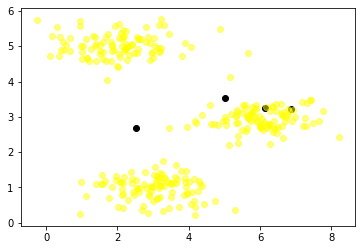

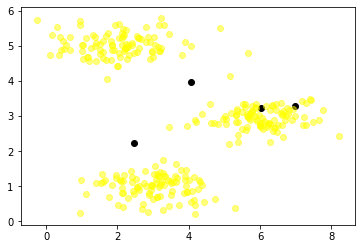

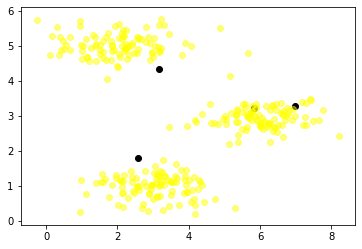

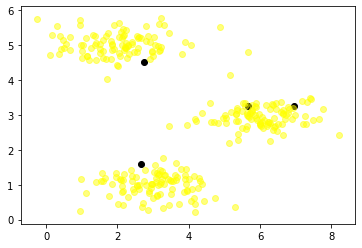

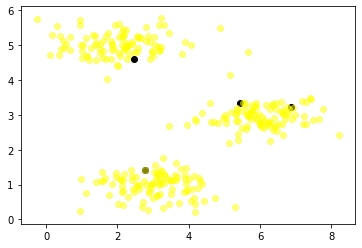

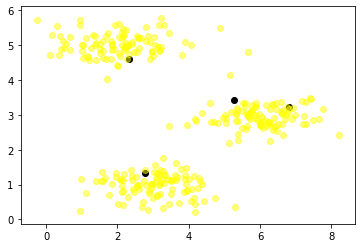

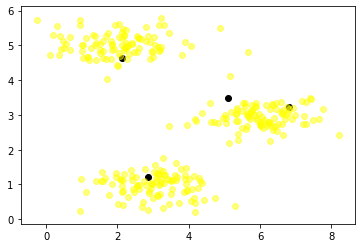

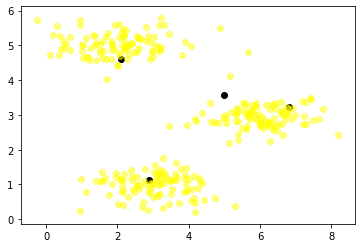

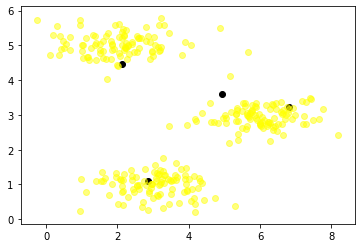

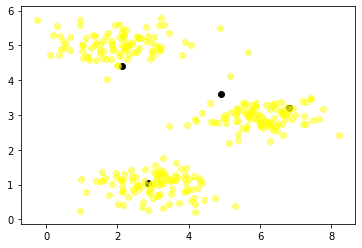

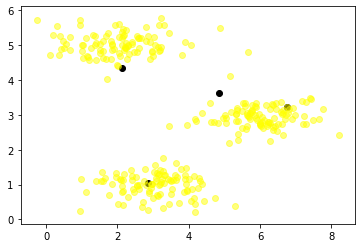

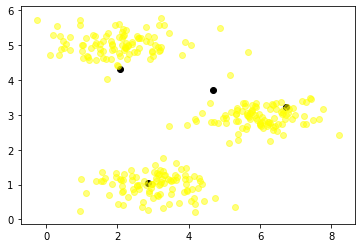

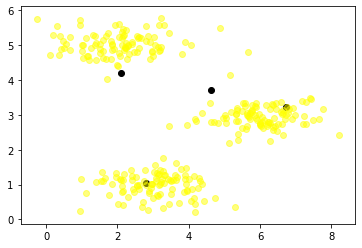

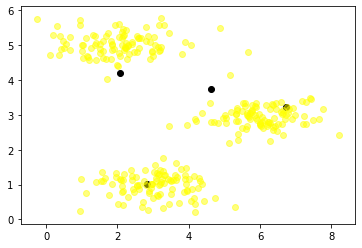

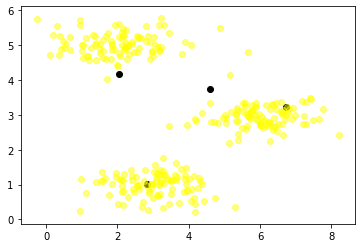

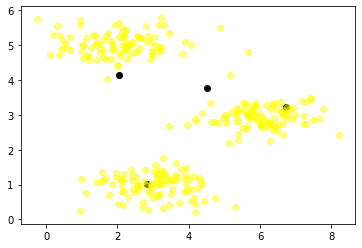

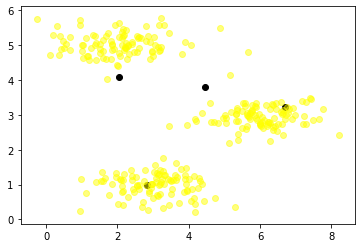

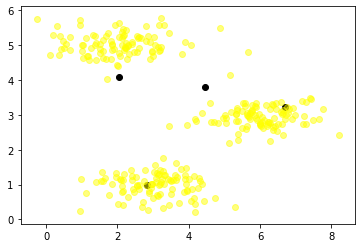

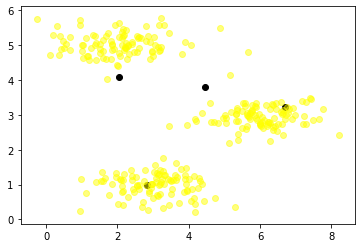

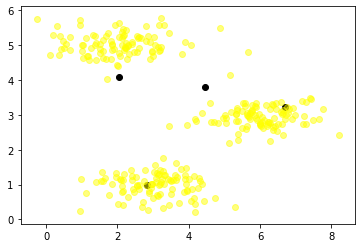

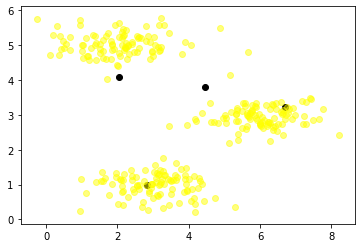

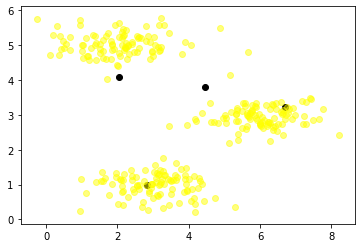

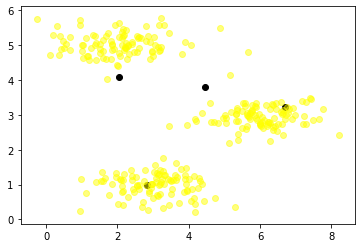

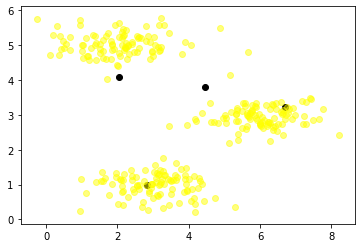

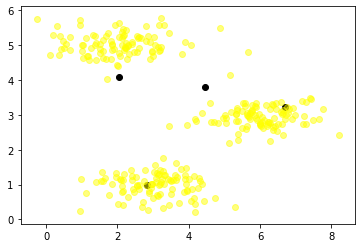

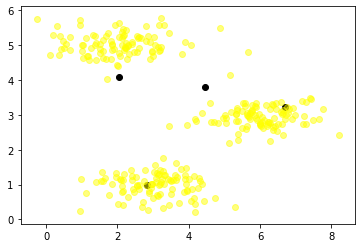

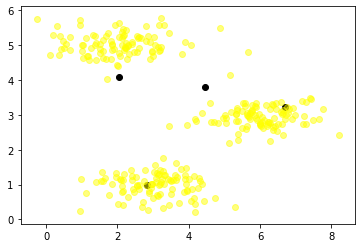

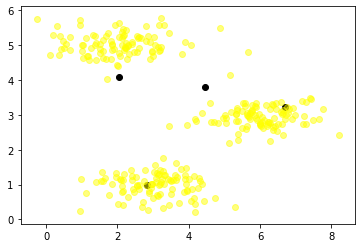

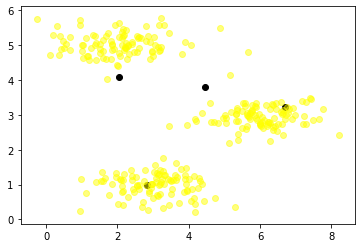

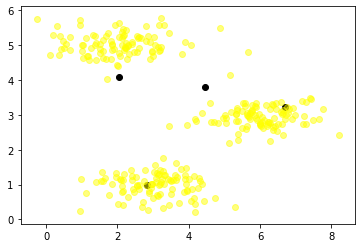

In [23]:
for i in range(30):
    get_centroid = findclosestcentroid(centroids,X)     #we have obtained the cluster number for each observation
    centroids = calc_centroids(get_centroid,X)

    #Visulaization
    plt.figure()
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black')    #Plot the Centroids point
    plt.scatter(X[:,0],X[:,1],color='yellow',alpha=0.5) 
    plt.show()